In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])
#1. Data Collection and Pre-processing
spectral_columns = [f'wavelength_{i}' for i in range(500, 951, 1)]  # Example spectral data columns

# Spectral wavelength data (500nm to 950nm)
wavelengths = np.linspace(500, 950, 451)

#1. Data Collection and Pre-processing
# Load data (replace with your actual file names)
df = pd.read_csv('PENICAL ALL.csv')

# Split dataframe into features (X) and target (y)
X = df.drop(columns=['SPAD'])  # Drop 'sample_id' and 'SPAD' to get the features
y = df['SPAD']  # Target variable

# Check for missing values
print(df.isnull().sum())

# Generate example spectral data for demonstration purposes
np.random.seed(42)
spectral_data = np.random.rand(100, 451)  # 100 samples, 451 features (e.g., 500nm to 950nm)
spad_values = np.random.rand(100) * (43 - 20) + 20  # SPAD values in the range 20 to 43

500.075    0
500.336    0
500.597    0
500.858    0
501.119    0
          ..
950.048    0
950.286    0
950.524    0
950.763    0
SPAD       0
Length: 1793, dtype: int64


In [2]:
#Explore data statistics
df.describe()

500.075    500.336    500.597    500.858    501.119    501.381  \
count  81.000000  81.000000  81.000000  81.000000  81.000000  81.000000   
mean    4.628025   4.740288   4.776872   4.778196   4.701488   4.737572   
std     0.551927   0.563607   0.566795   0.570103   0.564617   0.569699   
min     3.426667   3.523333   3.513333   3.456667   3.366667   3.393333   
25%     4.245000   4.340000   4.334444   4.340000   4.291111   4.307778   
50%     4.670000   4.758889   4.790000   4.783333   4.732222   4.771111   
75%     4.973333   5.133333   5.160000   5.136667   5.010000   5.064444   
max     6.423333   6.723333   6.830000   6.823333   6.563333   6.623333   

         501.642    501.903    502.164    502.425  ...    948.856    949.094  \
count  81.000000  81.000000  81.000000  81.000000  ...  81.000000  81.000000   
mean    4.823285   4.847202   4.800055   4.843909  ...  33.125658  32.724156   
std     0.577558   0.583951   0.584569   0.589872  ...   4.308998   4.550170   
min     3.450000   3.486667   3.426667   3.483333  ...  23.830000  23.130000   
25%     4.402222   4.420000   4.380000   4.415000  ...  30.255000  29.276667   
50%     4.838889   4.863333   4.836667   4.890000  ...  33.273333  33.075000   
75%     5.156667   5.186667   5.143333   5.210000  ...  36.757778  36.793333   
max     6.813333   6.846667   6.703333   6.793333  ...  40.026667  39.926667   

         949.333    949.571    949.809    950.048    950.286    950.524  \
count  81.000000  81.000000  81.000000  81.000000  81.000000  81.000000   
mean   32.820741  33.107949  32.948203  32.605562  32.611852  32.672716   
std     4.471129   4.298406   4.373473   4.634983   4.641574   4.581399   
min    23.283333  23.766667  23.576667  22.966667  22.913333  22.960000   
25%    29.600000  30.310000  30.020000  29.125000  29.050000  29.345000   
50%    33.096667  33.118889  33.073333  32.970000  32.880000  32.960000   
75%    36.748889  36.788889  36.743333  36.741111  36.777778  36.821111   
max    39.927778  39.937778  39.871111  39.838889  39.844444  39.835556   

         950.763       SPAD  
count  81.000000  81.000000  
mean   32.522462  34.975432  
std     4.729095   4.859557  
min    22.700000  21.900000  
25%    28.866667  32.200000  
50%    32.890000  34.300000  
75%    36.810000  39.370000  
max    39.886667  42.630000  

[8 rows x 1793 columns]

In [3]:
# 1. Multiplicative Scatter Correction (MSC)
#def msc(input_data):
    # Multiplicative Scatter Correction
    #mean_spectrum = np.mean(input_data, axis=0)
   # corrected_data = np.apply_along_axis(lambda x: (x - np.mean(x)) / np.std(x) * np.std(mean_spectrum) + np.mean(mean_spectrum), axis=1, arr=input_data)
   # return corrected_data

#spectral_data_msc = msc(spectral_data)

In [4]:
def savitzky_golay(input_data, window_size=11, poly_order=2):
    """ Perform Savitzky-Golay Smoothing """
    output_data = savgol_filter(input_data, window_size, poly_order, axis=0)
    return output_data
spectral_data_sgm = savitzky_golay(spectral_data)
from scipy.signal import savgol_filter

# Assuming spectral_data is your DataFrame or NumPy array with spectral data
spectral_data_sgm = savgol_filter(spectral_data, window_length=11, polyorder=2, axis=0)

In [5]:
#1. Pre-processing-Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_df = scaler.fit_transform(df)
X_train_scaled = scaler.fit_transform(df)
X_test_scaled = scaler.transform(df)

# Normalize spectral data
df_normalized = (df- df.mean()) / df.std()

In [6]:
# Calculate correlation coefficients #3. Data Analysis
correlation_matrix = df.corr()

# Extract correlations with SPAD
correlations_with_spad = correlation_matrix['SPAD'].drop('SPAD')

# Display correlation values
print(correlations_with_spad)

500.075    0.038074
500.336   -0.040404
500.597   -0.054075
500.858   -0.045958
501.119    0.036478
             ...   
949.809    0.571838
950.048    0.569403
950.286    0.566603
950.524    0.570252
950.763    0.569667
Name: SPAD, Length: 1792, dtype: float64


In [7]:
# Measures the statistical relationship between two features.
# Sort correlations with SPAD #Strongest linear relationships with the target variable. 
sorted_correlations = correlations_with_spad.abs().sort_values(ascending=False)
print("Top features correlated with SPAD:")
print(sorted_correlations.head(10))

Top features correlated with SPAD:
945.755    0.632242
945.517    0.626573
944.323    0.625959
944.8      0.624876
945.994    0.623468
945.039    0.623408
944.562    0.622816
945.278    0.622224
944.084    0.620160
946.232    0.613780
Name: SPAD, dtype: float64


In [8]:
# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=175)

In [9]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Display first few rows to verify
print("First few rows of the training data (smoothed and standardized):")
print(pd.DataFrame(X_train_scaled).head())
# Print shapes after standardization
print(f"Shape of X_train after standardization: {X_train.shape}")
print(f"Shape of X_test after standardization: {X_test.shape}")

First few rows of the training data (smoothed and standardized):
       0         1         2         3         4         5         6     \
0  0.723134  0.803507  0.753037  0.711600  0.598313  0.636130  0.665408   
1  0.235166  0.549098  0.701388  0.740201  0.447401  0.549857  0.727640   
2 -0.496785  0.098099  0.249946  0.265433 -0.086596  0.001543  0.233560   
3 -1.764311 -1.863939 -1.890579 -1.902482 -1.827890 -1.831283 -1.842709   
4 -1.148401 -1.176840 -1.137856 -1.061628 -0.902102 -0.902409 -0.963925   

       7         8         9     ...      1782      1783      1784      1785  \
0  0.671399  0.631451  0.680124  ... -0.908164 -0.911133 -0.917768 -0.913497   
1  0.676996  0.519388  0.519153  ... -0.557065 -0.614941 -0.733471 -0.704710   
2  0.188197  0.011367 -0.013718  ... -0.584817 -0.632562 -0.725082 -0.684432   
3 -1.869610 -1.820870 -1.801055  ...  0.857804  0.847361  0.878821  0.870962   
4 -0.904138 -0.772143 -0.804698  ... -0.343028 -0.341683 -0.281239 -0.299151   

   

In [10]:
def cfs(X, y, threshold=0.05):
    cor_target = np.array([pearsonr(X[:, i], y)[0] for i in range(X.shape[1])])
    selected_features = np.where(np.abs(cor_target) > threshold)[0]
    if len(selected_features) == 0:
        raise ValueError(f"No features selected by CFS. Consider lowering the threshold (currently {threshold}).")
    return X[:, selected_features]

# Apply CFS with a lower threshold
try:
    X_train_cfs = cfs(X_train_scaled, y_train, threshold=0.05)
    X_test_cfs = cfs(X_test_scaled, y_test, threshold=0.05)
    print(f"X_train_cfs shape: {X_train_cfs.shape}, X_test_cfs shape: {X_test_cfs.shape}")
except ValueError as e:
    print(e)
    # Optionally, handle the case where no features are selected
    # For now, we'll use all features if no features are selected by CFS
    X_train_cfs = X_train_scaled
    X_test_cfs = X_test_scaled

X_train_cfs shape: (64, 1754), X_test_cfs shape: (17, 1723)


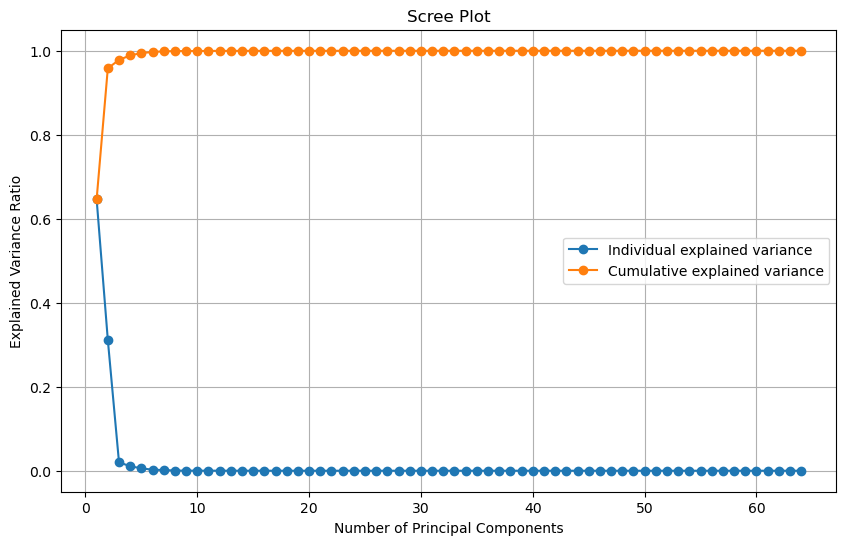

Number of components to retain 95% variance: 2


ValueError: X has 1723 features, but PCA is expecting 1754 features as input.

In [11]:
# Apply PCA to determine the number of components to retain 95% variance
pca = PCA()
X_train_pca_full = pca.fit_transform(X_train_cfs)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', label='Cumulative explained variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Choose number of components to retain 95% variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_cfs)
X_test_pca = pca.transform(X_test_cfs)


In [ ]:
# Define parameter grids for RandomizedSearchCV

# Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Initialize models
model_rf = RandomForestRegressor(random_state=175)
# Perform RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_dist_rf, n_iter=32, cv=5,
                                      scoring='neg_mean_squared_error', n_jobs=-1, random_state=200, error_score='raise')
random_search_rf.fit(X_train_cfs, y_train)
best_rf = random_search_rf.best_estimator_
best_params_rf = random_search_rf.best_params_
print("Best parameters for Random Forest: ", best_params_rf)
# Cross-validation with the best hyperparameters for each model
mse_scores_rf = cross_val_score(best_rf, X_train_cfs, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_rf = -mse_scores_rf
average_mse_rf = np.mean(mse_scores_rf)
# Print cross-validation results
print(f"Average MSE for Random Forest: {average_mse_rf}")

# Evaluate the individual models
models = {
    "RandomForest": best_rf
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_cfs, y_train)
    
    y_train_pred = model.predict(X_train_cfs)
    y_test_pred = model.predict(X_test_cfs)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

# Display metrics for the models
print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

In [ ]:
# Define parameter grids for RandomizedSearchCV
# XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize models
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=175)
# Perform RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(model_xgb, param_distributions=param_dist_xgb, n_iter=32, cv=5,
                                       scoring='neg_mean_squared_error', n_jobs=-1, random_state=200, error_score='raise')
random_search_xgb.fit(X_train_cfs, y_train)
best_xgb = random_search_xgb.best_estimator_
best_params_xgb = random_search_xgb.best_params_
print("Best parameters for XGBoost: ", best_params_xgb)

# Cross-validation with the best hyperparameters for each model
mse_scores_xgb = cross_val_score(best_xgb, X_train_cfs, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_xgb = -mse_scores_xgb
average_mse_xgb = np.mean(mse_scores_xgb)

# Print cross-validation results
print(f"Average MSE for XGBoost: {average_mse_xgb}")

# Evaluate the individual models
models = {
       "XGBoost": best_xgb
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_cfs, y_train)
    
    y_train_pred = model.predict(X_train_cfs)
    y_test_pred = model.predict(X_test_cfs)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

# Display metrics for the models
print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

In [ ]:
# Define parameter grids for RandomizedSearchCV
param_dist_gb = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 6, 9, 12]
}
# Initialize models
model_gb = GradientBoostingRegressor(random_state=150)
# Perform RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(model_gb, param_distributions=param_dist_gb, n_iter=32, cv=5,
                                      scoring='neg_mean_squared_error', n_jobs=-1, random_state=200, error_score='raise')
random_search_gb.fit(X_train_cfs, y_train)
best_gb = random_search_gb.best_estimator_
best_params_gb = random_search_gb.best_params_
print("Best parameters for Gradient Boosting: ", best_params_gb)
# Cross-validation with the best hyperparameters for each model
mse_scores_gb = cross_val_score(best_gb, X_train_cfs, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_gb = -mse_scores_gb
average_mse_gb = np.mean(mse_scores_gb)
# Print cross-validation results
print(f"Average MSE for Gradient Boosting: {average_mse_gb}")
# Evaluate the individual models
models = {
    "GradientBoosting": best_gb
}
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_cfs, y_train)
    
    y_train_pred = model.predict(X_train_cfs)
    y_test_pred = model.predict(X_test_cfs)
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T) 

In [ ]:
# Define parameter grids for RandomizedSearchCV
# SVR
param_dist_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
# Initialize models
model_svr = SVR()
# Perform RandomizedSearchCV for SVR
random_search_svr = RandomizedSearchCV(model_svr, param_distributions=param_dist_svr, n_iter=18, cv=5,
                                       scoring='neg_mean_squared_error', n_jobs=-1, random_state=200, error_score='raise')
random_search_svr.fit(X_train_cfs, y_train)
best_svr = random_search_svr.best_estimator_
best_params_svr = random_search_svr.best_params_
print("Best parameters for SVR: ", best_params_svr)
# Cross-validation with the best hyperparameters for each model
mse_scores_svr = cross_val_score(best_svr, X_train_cfs, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_svr = -mse_scores_svr
average_mse_svr = np.mean(mse_scores_svr)

# Print cross-validation results
print(f"Average MSE for SVR: {average_mse_svr}")

# Evaluate the individual models
models = {
    "SVR": best_svr
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_cfs, y_train)
    
    y_train_pred = model.predict(X_train_cfs)
    y_test_pred = model.predict(X_test_cfs)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

# Display metrics for the models
print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

In [ ]:
# Define parameter grids for RandomizedSearchCV

# ElasticNet
param_dist_elnet = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'max_iter': [1000, 5000, 10000]
}
# Initialize models
model_elnet = ElasticNet(random_state=175)
# Perform RandomizedSearchCV for ElasticNet
random_search_elnet = RandomizedSearchCV(model_elnet, param_distributions=param_dist_elnet, n_iter=32, cv=5, 
                                         scoring='neg_mean_squared_error', n_jobs=-1, random_state=200, error_score='raise')
random_search_elnet.fit(X_train_cfs, y_train)
best_elnet = random_search_elnet.best_estimator_
best_params_elnet = random_search_elnet.best_params_
print("Best parameters for ElasticNet: ", best_params_elnet)
# Cross-validation with the best hyperparameters for each model
mse_scores_elnet = cross_val_score(best_elnet, X_train_cfs, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_elnet = -mse_scores_elnet
average_mse_elnet = np.mean(mse_scores_elnet)
# Print cross-validation results
print(f"Average MSE for ElasticNet: {average_mse_elnet}")

# Evaluate the individual models
models = {
    "ElasticNet": best_elnet
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_cfs, y_train)
    
    y_train_pred = model.predict(X_train_cfs)
    y_test_pred = model.predict(X_test_cfs)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

# Display metrics for the models
print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)


In [ ]:
# Define parameter grids for RandomizedSearchCV
# PLSR (n_components is the key hyperparameter)
param_dist_plsr = {
    'n_components': [2, 3, 5, 10]
}
# Initialize models
model_plsr = PLSRegression()
# Perform RandomizedSearchCV for PLSR
random_search_plsr = RandomizedSearchCV(model_plsr, param_distributions=param_dist_plsr, n_iter=4, cv=5, 
                                        scoring='neg_mean_squared_error', n_jobs=-1, random_state=200, error_score='raise')
random_search_plsr.fit(X_train_cfs, y_train)
best_plsr = random_search_plsr.best_estimator_
best_params_plsr = random_search_plsr.best_params_
print("Best parameters for PLSR: ", best_params_plsr)

# Cross-validation with the best hyperparameters for each model
mse_scores_plsr = cross_val_score(best_plsr, X_train_cfs, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_plsr = -mse_scores_plsr
average_mse_plsr = np.mean(mse_scores_plsr)

# Print cross-validation results
print(f"Average MSE for ElasticNet: {average_mse_elnet}")
print(f"Average MSE for Gradient Boosting: {average_mse_gb}")
print(f"Average MSE for PLSR: {average_mse_plsr}")

# Evaluate the individual models
models = {
    "PLSR": best_plsr
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_cfs, y_train)
    
    y_train_pred = model.predict(X_train_cfs)
    y_test_pred = model.predict(X_test_cfs)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

# Display metrics for the models
print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

In [ ]:
# Ensemble the models using Voting Regressor
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('gb', best_gb),
    ('svr', best_svr),
    ('elnet', best_elnet)
])

ensemble_model.fit(X_train_pca, y_train)
y_ensemble_pred = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
ensemble_metrics_train = calculate_metrics(y_train, ensemble_model.predict(X_train_pca))
ensemble_metrics_test = calculate_metrics(y_test, y_ensemble_pred)
print("\nEnsemble Model Training Metrics:")
print(pd.DataFrame(ensemble_metrics_train, index=["Ensemble"]).T)
print("\nEnsemble Model Testing Metrics:")
print(pd.DataFrame(ensemble_metrics_test, index=["Ensemble"]).T)